## Import Statements

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

## Creating a Dataset for the Example

In [3]:
dataset = make_classification(n_samples=100000, n_features=5)
dataset = np.c_[dataset[0], dataset[1]]

In [4]:
df = pd.DataFrame(dataset, columns=['A', 'B', 'C', 'D', 'E', 'Target'])

Here I use a function built in to Scikit-learn to create a dataset for visualization. It will create a dataset with (in this case) 100,000 rows, and 5 features, and a target feature. I then transfrorm the dataset and instantiate a DataFrame with those values and the Target vector.

In [5]:
df.describe()

,A,B,C,D,E,Target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.002157,-0.002664,-0.004562,-0.000122,-0.002205,0.500310
std,1.012689,1.267726,0.999719,1.294602,1.371741,0.500002
min,-3.174281,-4.882892,-4.271961,-4.296562,-3.510154,0.000000
25%,-0.822954,-1.032097,-0.681497,-1.013731,-1.106063,0.000000
50%,-0.013361,-0.002420,-0.006025,-0.233860,-0.039060,1.000000
75%,0.735118,1.002230,0.670843,1.011367,0.774462,1.000000
max,4.442970,5.443542,4.154140,5.979651,6.431004,1.000000


## Some simple plots

I am using Seaborn because it will do most of the work for you in the background. 

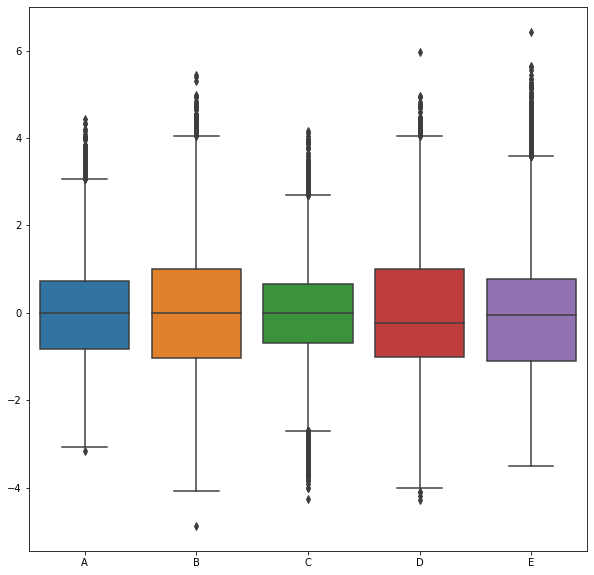

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df[['A', 'B', 'C', 'D', 'E']])
plt.show()

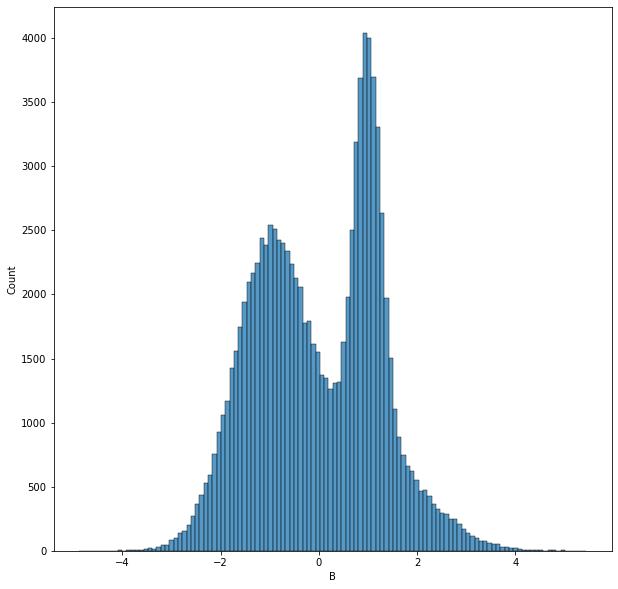

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data=df, x='B')
plt.show()

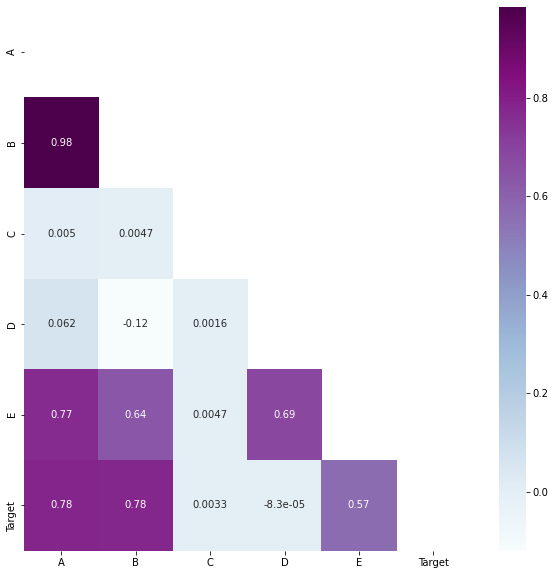

In [8]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=corr, mask=mask, annot=True, cmap='BuPu')
plt.show()

Due to the correlation between columns, 'A', 'B' and 'E', I am going to plot a multi-variate distribution plot, to have a look and see if a clustering approach might be valuable.

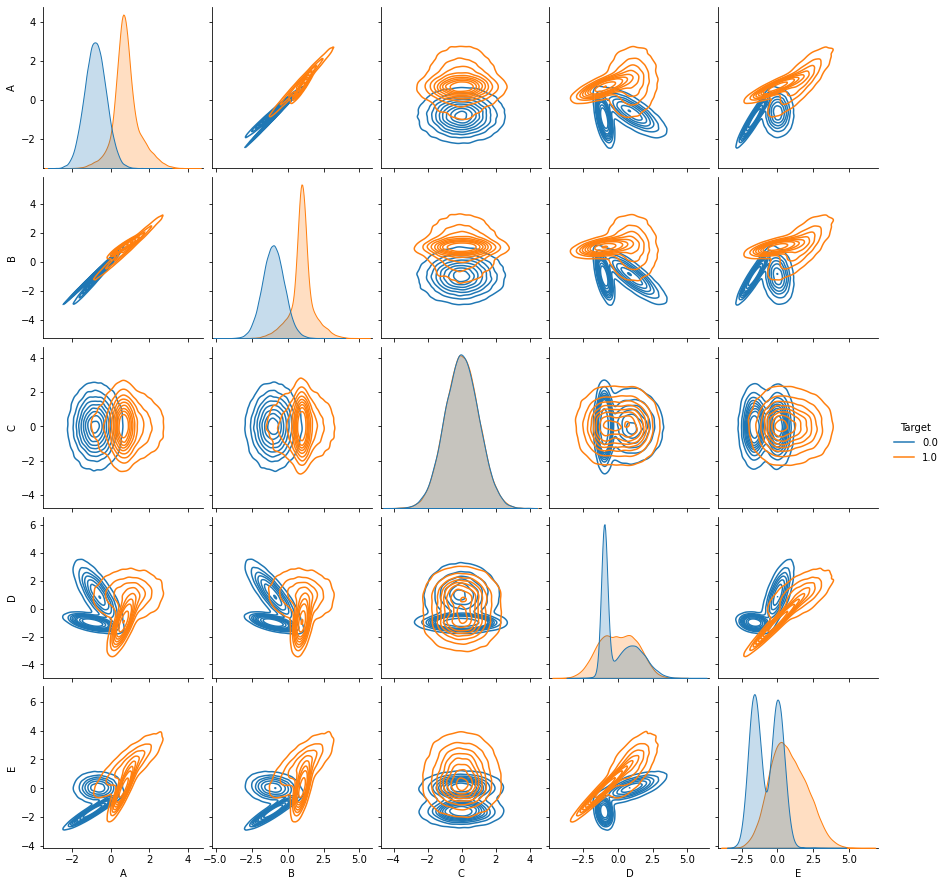

In [11]:
sns.pairplot(data=df, hue='Target', kind='kde')
plt.show()